In [29]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [235]:
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False

In [236]:
sample_info = pd.read_csv('middle_sample_info.csv', index_col=0)
results = pd.read_csv('middle_final_results.csv', index_col=0)
ms_results = pd.read_csv('middle_MS_results.csv', index_col=0)

In [237]:
df = pd.read_csv('data/rep6/middle_exp_mat.csv', index_col=0)
df = df.loc[sample_info.index]
df = df.T[df.sum(0) >= 3].T  # Filter practically unobserved genes

dfm = np.log10(df + 1)

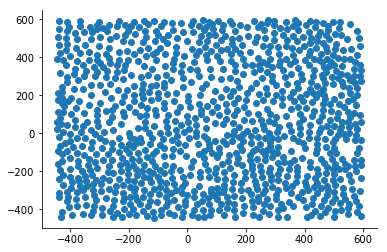

In [242]:
figsize(6, 4)
plt.scatter(sample_info.abs_X, sample_info.abs_Y);

In [243]:
results['pval'] = results['pval'].clip_lower(results.query('pval > 0')['pval'].min() / 2)
results['qval'] = results['qval'].clip_lower(results.query('qval > 0')['qval'].min() / 2)
ms_results['pval'] = ms_results['pval'].clip_lower(ms_results.query('pval > 0')['pval'].min() / 2)
ms_results['qval'] = ms_results['qval'].clip_lower(ms_results.query('qval > 0')['qval'].min() / 2)

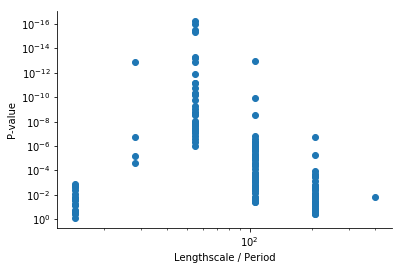

In [244]:
plt.loglog()
plt.scatter(results.l, results.pval);
plt.gca().invert_yaxis();
plt.xlabel('Lengthscale / Period')
plt.ylabel('P-value');

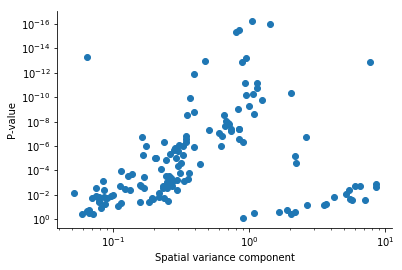

In [245]:
plt.loglog()
plt.scatter(results.max_s2_t_hat, results.pval);
plt.gca().invert_yaxis();
plt.xlabel('Spatial variance component')
plt.ylabel('P-value');

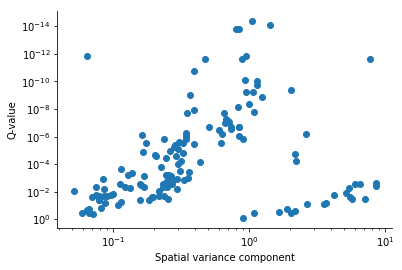

In [246]:
plt.loglog()
plt.scatter(results.max_s2_t_hat, results.qval);
plt.gca().invert_yaxis();
plt.xlabel('Spatial variance component')
plt.ylabel('Q-value');

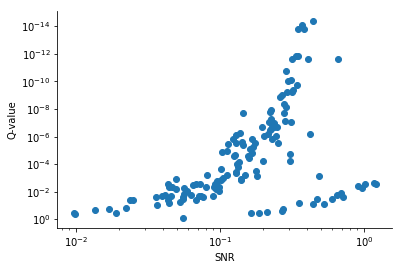

In [247]:
plt.loglog()
plt.scatter(1./results.max_delta, results.qval);
plt.gca().invert_yaxis();
plt.xlabel('SNR')
plt.ylabel('Q-value');

In [248]:
results.query('qval < 0.05').shape

(122, 15)

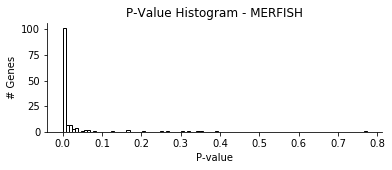

In [249]:
figsize(6, 2)
plt.hist(results.query('pval < 1.')['pval'], bins=100, color='w', ec='k');
plt.title('P-Value Histogram - MERFISH')
plt.ylabel('# Genes')
plt.xlabel('P-value');
# plt.ylim(ymax=400)

In [270]:
N = 5
top_per_ls = ms_results.query('qval < 0.05') \
                  .sort_values('qval', ascending=True) \
                  .groupby(['model', 'l']) \
                  .head(N) \
                  .sort_values(['l', 'qval'], ascending=[True, True])
                
top_per_ls

,BIC,LLR,M,g,l,max_delta,max_ll,max_mu_hat,max_s2_t_hat,model,n,time,pval,qval,max_ll_null
35,1519.276576,9.792328,4,ANKH,14.490174,9.786052e-01,-745.713801,-3.797725,5.946227,SE,1056,0.000657,1.752415e-03,2.850931e-03,-755.506129
36,1500.372654,6.050163,4,Blank-9,14.490174,1.531558e+00,-736.261840,-3.526839,4.191396,SE,1056,0.000800,1.390501e-02,1.836511e-02,-742.312004
38,2548.906157,54.701055,4,CENPF,28.116048,1.517295e+00,-1260.528592,-6.732297,7.666613,SE,1056,0.000896,1.403322e-13,2.182945e-12,-1315.229646
40,742.638429,27.269785,4,MYH10,28.116048,2.357634e+00,-357.394728,-4.234265,2.594877,SE,1056,0.001304,1.769551e-07,6.519399e-07,-384.664513
37,1317.347305,20.285033,4,CDYL2,28.116048,3.272592e+00,-644.749165,-4.110561,2.174463,SE,1056,0.001542,6.672049e-06,1.668012e-05,-665.034198
39,970.849975,17.649150,4,HERC2,28.116048,3.274197e+00,-471.500501,-4.158030,2.209942,SE,1056,0.001464,2.656340e-05,5.998187e-05,-489.149651
68,1002.476859,73.034420,4,SPTBN1,54.555049,2.243131e+00,-487.313943,-4.252696,1.057549,SE,1056,0.000993,5.551115e-17,3.885781e-15,-560.348363
70,2377.925781,69.957546,4,THBS1,54.555049,2.679883e+00,-1175.038404,-4.803833,1.414772,SE,1056,0.000966,1.110223e-16,7.771561e-15,-1244.995950
50,1358.152969,66.264681,4,COL5A1,54.555049,2.861989e+00,-665.151998,-3.733500,0.805316,SE,1056,0.000964,4.440892e-16,1.554312e-14,-731.416679
53,1092.805468,66.702543,4,FASN,54.555049,2.607501e+00,-532.478247,-3.816273,0.841411,SE,1056,0.000964,3.330669e-16,1.554312e-14,-599.180790


In [271]:
top_per_ls.shape

(38, 15)

In [272]:
import NaiveDE

dfm = NaiveDE.stabilize(df.T).T
res = NaiveDE.regress_out(sample_info, dfm.T, 'np.log(cytoplasmArea)').T

In [273]:
from sklearn.preprocessing import scale

In [274]:
model_colors = {'SE': 'C0', 'PER': 'C1'}

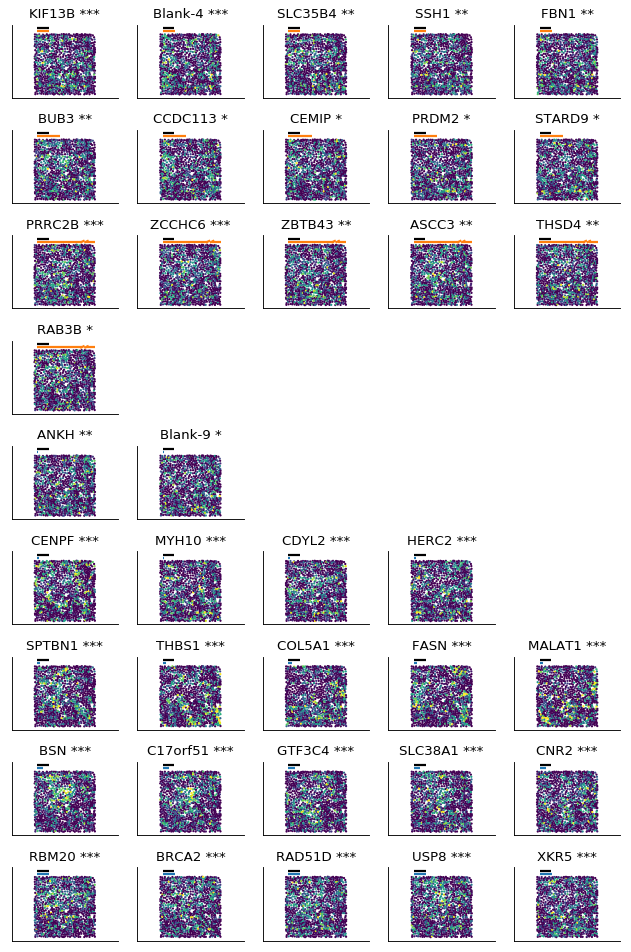

In [276]:
plt.figure(figsize=(8, 12), dpi=80)

N = 5
N_rows = top_per_ls['l'].unique().shape[0]
for j, T in enumerate(top_per_ls.groupby(['model', 'l'])):
    _, group = T
    for i, idx in enumerate(group.index):
        r = top_per_ls.loc[idx]
        plt.subplot(N_rows, N, j * N + i + 1)
        
        plt.scatter(sample_info.abs_X, sample_info.abs_Y, c=scale(res[r['g']], with_std=True), s=1, vmin=0, vmax=2, rasterized=True);
        
        s = ' *'
        if r['qval'] < 0.01:
            s = ' **'

        if r['qval'] < 0.001:
            s = ' ***'

        plt.title(r['g'] + s)
        
        plt.xticks([])
        plt.yticks([])
        plt.hlines(700, -400, -200, lw=2)
        if -400 + r['l'] < 600:
            plt.hlines(650, -400, -400 + r['l'], lw=2, color=model_colors[r['model']], zorder=0)
        else:
            plt.hlines(650, -400, 380, lw=2, color=model_colors[r['model']], zorder=0)
            plt.plot([360, 400], [640, 660], lw=2, color=model_colors[r['model']])
            plt.plot([430, 470], [640, 660], lw=2, color=model_colors[r['model']])
            plt.hlines(650, 450, 600, lw=2, color=model_colors[r['model']], zorder=0)
        
        plt.axis('equal')

plt.tight_layout()
plt.savefig('top_MF_genes_per_ls.pdf')

In [256]:
blank_genes = results[results.g.str.startswith('Blank-')]['g'].tolist()

In [257]:
N = 3
top_per_ls = ms_results.query('g not in @blank_genes and qval < 1e-4') \
                  .sort_values('qval', ascending=True) \
                  .groupby(['model', 'l']) \
                  .head(N) \
                  .sort_values(['l', 'qval'], ascending=[True, True])

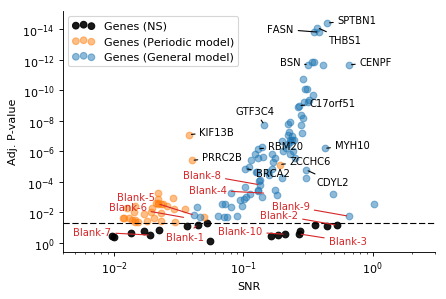

In [268]:
plt.figure(figsize=(6, 4), dpi=80)

plt.xscale('log')
plt.yscale('log')


tmp = results.query('qval > 0.05')
plt.scatter(1./ tmp['max_delta'], tmp['qval'],
            alpha=0.9, rasterized=True, label='Genes (NS)', marker='o', color='k');

tmp = ms_results.query('model == "PER"')
plt.scatter(1./ tmp['max_delta'], tmp['qval'],
            alpha=0.5, rasterized=True, label='Genes (Periodic model)', marker='o', color='C1');

tmp = ms_results.query('model == "SE"')
plt.scatter(1./ tmp['max_delta'], tmp['qval'],
            alpha=0.5, rasterized=True, label='Genes (General model)', marker='o', color='C0');

# Annotate negative controls
tmp = results.query('g in @blank_genes')

x_offsets = {'Blank-3': 3e-1,
             'Blank-10': 1.5e0,
             'Blank-1': 9e-1}
y_offsets = {'Blank-3': 2e-1,
             'Blank-5': 1e1,
             'Blank-1': 1e-1,
             'Blank-4': 1e0,
             'Blank-10': 1,
             'Blank-7': 1}
for i, r in tmp.iterrows():
    xy = (1./r['max_delta'], r['qval'])
    xyt = (xy[0] / x_offsets.get(r['g'], 2),
           xy[1] / y_offsets.get(r['g'], 3),)
    plt.annotate(r['g'], xy, xyt, color='tab:red', horizontalalignment='right',
                 arrowprops={'arrowstyle': '-', 'color': 'tab:red'}, size=9)
    
# Annotate top genes
x_offsets = {'FASN': 4e-1,
             'BSN': 6e-1,
             'GTF3C4': 6e-1}
y_offsets = {'THBS1': 1e-1,
             'CDYL2': 1e-1,
             'GTF3C4': 5e0,
             'BRCA2': 3e-1}
for i, r in top_per_ls.iterrows():
    xy = (1./r['max_delta'], r['qval'])
    xyt = (xy[0] * x_offsets.get(r['g'], 1.2),
           xy[1] / y_offsets.get(r['g'], 1),)
    plt.annotate(r['g'], xy, xyt, color='k', arrowprops={'arrowstyle': '-'}, size=9)


plt.xlim(4e-3, 3e0)
plt.axhline(0.05, ls='--', c='k', lw=1)
plt.xlabel('SNR');
plt.ylabel('Adj. P-value');
plt.gca().invert_yaxis()

plt.legend(scatterpoints=3, loc='upper left');

plt.savefig('sigma_pval_MF.pdf', bbox_inches='tight');